# Python Exercises
## Eric Kerfoot, Esther Puyol
VPH Summer School 2019

The purpose of this notebook is to provide of exercises for the concepts discussed in the introduction lecture. Below will be a number of cells with comments describing what code needs to be provided or other instructions.

The first concepts we discussed were types:

In [ ]:
val = 42
print(val)

The integer value `42` is numerically equivalent to the floating point value is represented as a different type. The type names `int` and `float` can be used to convert between types:

In [ ]:
fval=float(val)
print(val,fval)

The `type` function can be used to query the type of objects:

In [ ]:
print(type(val),type(fval))

How these different types produce different results when applied to numeric operators is important to understand. Assign integer and float values in different combinations to `a` and `b` to see what the `+` operator does:

In [1]:
# replace None with integer or float values
a = 123
b = 456.789e10

print(a+b,type(a),type(b),type(a+b))

4567890000123.0 <class 'int'> <class 'float'> <class 'float'>


Operators are provided for mathematics (`+ - * / // %`), comparison (`== != <= >= < >`) and others. 

In [2]:
print(a*b, a/b)

561850470000000.0 2.6927093253121245e-11


The type names `int`, `float`, `str`, and others can be used to convert between values:

In [3]:
# replace None with the string representation of `a`
astr = str(a)

print(astr,type(astr),a==astr)

123 <class 'str'> False


We construct lists with the `list` operator or `[]` syntax. Similarly tuple can be constructed with `tuple` or `()`. 

In [4]:
names = ['John','Graham']
# add a name to the end of the list using append()

print(names)
# print the 0'th element of names
print(names[0])

['John', 'Graham']
John


In [5]:
names = ('John','Graham') # can't modify tuples

newnames=names+('Pablo',) # add a name to names by creating a new tuple 

print(newnames)

('John', 'Graham', 'Pablo')


Conditionals in Python take the form of `if-elif-else` code blocks. The condition checks to see if the given expression evaluates to `True` and executes the block if this is so, otherwise it checks the next `elif` block or `else` block.

In [6]:
number = 3.14159 # try other values

# use an if-else block to print "Yes" if `number` is greater than 0 otherwise "No" 
if number > 0:
    print('Yes')
else:
    print('No')

Yes


The `for` loop can be used to iterate over the members of a collection such as a list or tuple. 

In [8]:
numbers = [411, 131, 272, 737, 129, 591, 943, 801, 62, 357, 199, 814, 136, 523, 556, 55, 860, 943, 411, 760]

# write a loop to print the even numbers from `numbers` (% is remainder operator)
for i in numbers:
    if i % 2 == 0:
        print(i)

272
62
814
136
556
860
760


Routines are defined starting with the `def` keyword, the name of the routine, its arguments, then its body.

In [9]:
# define a routine called `isEven` which returns whether a given number is even or not
def isEven(n):
    if n % 2 == 0:
        return True
    else:
        return False
    
print(isEven(42),isEven(numbers[11]),isEven(numbers[-1])) # -1 is the last element, -2 second last, etc.

True True True


In [10]:
# a list comprehension is an expression which builds a list using an internal for loop
print([v for v in numbers if isEven(v)]) # print all the even numbers

# define a function `getEvens` to do the same thing for a given input list

def getEvens(n):
    result=[]
    for i in n:
        if i % 2 == 0:
            result.append(i)
            
    return result

print(getEvens(numbers))

[272, 62, 814, 136, 556, 860, 760]
[272, 62, 814, 136, 556, 860, 760]


Recall the `Dimension` type from the lecture notes:

In [11]:
class Dimension:
    def __init__(self, width, height): # constructor for object
        self.width = width # declare members by assignment
        self.height = height
        
    def measure(self): # method of class
        return self.width * self.height

In [12]:
# Define a subclass of `Dimension` called `Dimension3` which adds a third dimension member `depth` and 
# overrides `measure()` appropriately:
class Dimension3(Dimension):
    def __init__(self,width,height,depth):
        super().__init__(width,height)
        self.depth=depth
        
    def measure(self):
        return self.width*self.height*self.depth

In [13]:
d=Dimension3(10,12,22)

print(d,d.depth,d.measure())

# assert is used to assert some property of the program is True
assert d.measure() == (10*12*22)

<__main__.Dimension3 object at 0x00000000061D7C88> 22 2640


## Numpy

Numpy is the numeric Python package we use for large array data. It is typically imported with `import numpy as np` so that it can be conveniently referred to by the short name `np`. 

In [15]:
# import numpy and convert `numbers` to a numpy array by applying np.array to it
import numpy as np
arr=np.array(numbers)
print(arr.shape, arr.ndim, arr.dtype)

(20,) 1 int32


Given `arr`, create a new array of the same length containing the cumulative sum for each position in `arr` (ie. position `i` in your new array is the sum of `arr` up to `i`)

In [20]:
cumsum=np.zeros_like(arr) # zeros_like creates a new array of the same type/size but with zeros
# fill in cumsum here (don't cheat and use np.cumsum)

for i in range(arr.shape[0]):
    cumsum[i]=np.sum(arr[:i+1])

We can then use matplotlib to visualize this as a plot:

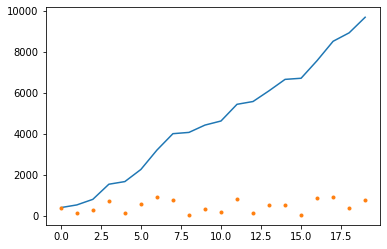

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cumsum)
plt.plot(arr,'.')

In [ ]:
# expand on the above by plotting the `cumsum` value with the original `arr` value using different line styles
# see: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

Matrices can be indexed directly to read or write values. This allows a loop, or nested loops, to iterate over the members of an array to fill it in. 

In [24]:
dim=40 # try other values
arr=np.zeros((dim,dim)) # try non-square matrices 

# fill in the members of `arr` such that the entry at [i,j] equals i*j
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        arr[i,j]=i*j

A 2D array can be treated like an image with Matplotlib:

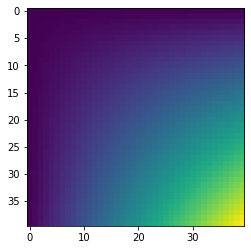

In [25]:
plt.imshow(arr)

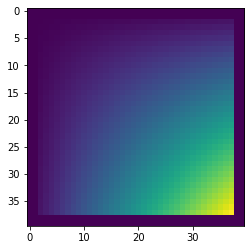

In [26]:
# Set a 2-pixel border of `arr` to -1 and plot it again
arr[:2,:]=-1
arr[-2:,:]=-1
arr[:,:2]=-1
arr[:,-2:]=-1

plt.imshow(arr)

Let's view a color image:

(300, 451, 3)


'[' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


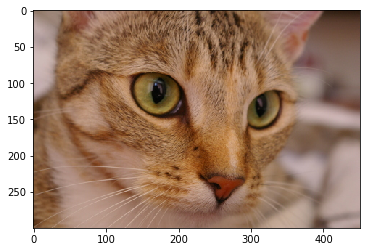

In [27]:
# in Colab you will have to download the file first, comment it out otherwise
![ -f chelsea.png ] || wget https://github.com/ericspod/VPHSummerSchool2019/raw/master/chelsea.png
    
cat=plt.imread('chelsea.png')
print(cat.shape)
plt.imshow(cat)

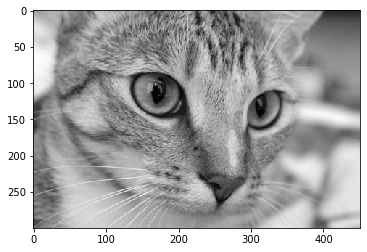

In [29]:
# A color image is stored in HWC order where C is the red-green-blue channels. Convert the above image to
# greyscale by multiplying the channels together by some weighted factor and show it.

greycat=cat[:,:,0]*0.3333+cat[:,:,1]*0.3333+cat[:,:,2]*0.3333

plt.imshow(greycat,cmap='gray')